In [46]:
%reload_ext autoreload
%autoreload 2

In [47]:
# Misc
import os, sys
from glob import glob

In [56]:
import random

In [48]:
# Dataframes and such
import pandas as pd
import numpy as np

In [49]:
# Plotting
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [50]:
# Ipython stuff
import IPython
import IPython.display as ipd

In [51]:
# Audio stuff
import librosa
import librosa.display

In [52]:
DATA_FOLDER = "../data/gtzan"

## Sample audio files

In [53]:
# Had to remove jazz file #54 because of corruption, apparently

In [54]:
# Make a list of all the wav files in the dataset and store them in a variable
audio_files = glob(f"{DATA_FOLDER}/*/*.wav")

In [57]:
random_file = random.choice(audio_files)
print(f"Showing random file {os.path.basename(random_file)}")
ipd.Audio(random_file)

Showing random file blues.00009.wav


In [58]:
# Load audio file with librosa
y, sr = librosa.load(random_file)

print(f"y is a {type(y)}, sr is a {type(sr)}")
print(f"First 10 elements of y: {y[:10]}")
print(f"Shape of Y: {y.shape}")
print(f"Sample Rate: {sr}")

y is a <class 'numpy.ndarray'>, sr is a <class 'int'>
First 10 elements of y: [ 0.04647827  0.06399536  0.04327393  0.03826904  0.02841187  0.01647949
  0.01138306  0.00192261 -0.00778198 -0.01516724]
Shape of Y: (661794,)
Sample Rate: 22050


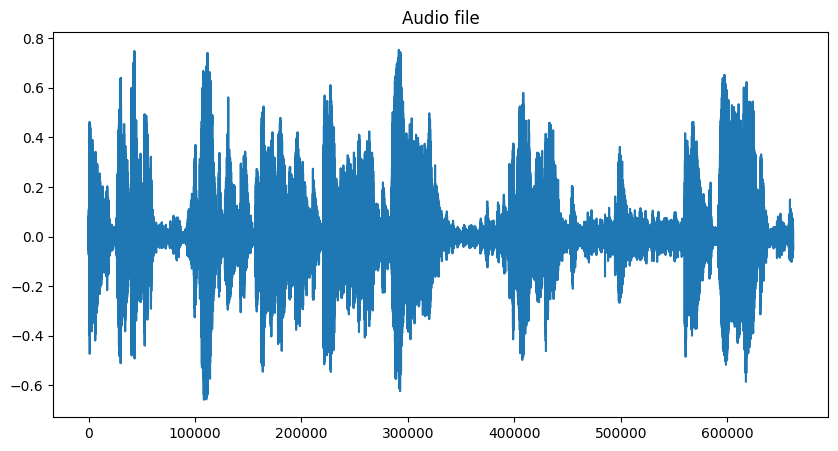

In [59]:
# Plot the actual wave
plt.figure(figsize=(16, 8))
pd.Series(y).plot(figsize=(10, 5), title="Audio file");

### MEL Spectrograms

In [95]:
# apply mel spectogram without STFT

hop_length = 512

n_fft = 2048
n_mels = 512

In [ ]:
OUT_FOLDER = "../data/gtzan_mels"

In [97]:
for af in audio_files:
    
    break
    
    af_arr = af.split('/')
    genre = af_arr[-2]
    fname = af_arr[-1]
    
    genre_folder = f"{OUT_FOLDER}/{genre}"
    
    os.makedirs(genre_folder, exist_ok=True)
    
    # Load audio file and create spectrogram
    y, sr = librosa.load(random_file)
    
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=256)
    
    
    S_db_mel = librosa.amplitude_to_db(S, ref=np.max)
    
    out_file = f"{genre_folder}/{fname[:-4]}.npy"
    
    processed_files['path'].append(out_file)
    processed_files['genre'].append(genre)
    
    np.save(out_file, S_db_mel)

../data/gtzan/metal/metal.00000.wav
../data/gtzan/metal/metal.00032.wav
../data/gtzan/metal/metal.00034.wav
../data/gtzan/metal/metal.00063.wav
../data/gtzan/metal/metal.00090.wav
../data/gtzan/metal/metal.00051.wav
../data/gtzan/metal/metal.00002.wav
../data/gtzan/metal/metal.00065.wav
../data/gtzan/metal/metal.00083.wav
../data/gtzan/metal/metal.00021.wav
../data/gtzan/metal/metal.00081.wav
../data/gtzan/metal/metal.00029.wav
../data/gtzan/metal/metal.00050.wav
../data/gtzan/metal/metal.00009.wav
../data/gtzan/metal/metal.00033.wav
../data/gtzan/metal/metal.00087.wav
../data/gtzan/metal/metal.00020.wav
../data/gtzan/metal/metal.00075.wav
../data/gtzan/metal/metal.00078.wav
../data/gtzan/metal/metal.00064.wav
../data/gtzan/metal/metal.00025.wav
../data/gtzan/metal/metal.00057.wav
../data/gtzan/metal/metal.00066.wav
../data/gtzan/metal/metal.00060.wav
../data/gtzan/metal/metal.00098.wav
../data/gtzan/metal/metal.00046.wav
../data/gtzan/metal/metal.00054.wav
../data/gtzan/metal/metal.00

In [96]:
S = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=n_fft, n_mels=n_mels, hop_length=hop_length)
print("Shape of Mel Spectogram", S.shape)

# use that converting function as above
S_db_mel = librosa.amplitude_to_db(S, ref=np.max)

Shape of Mel Spectogram (512, 1293)


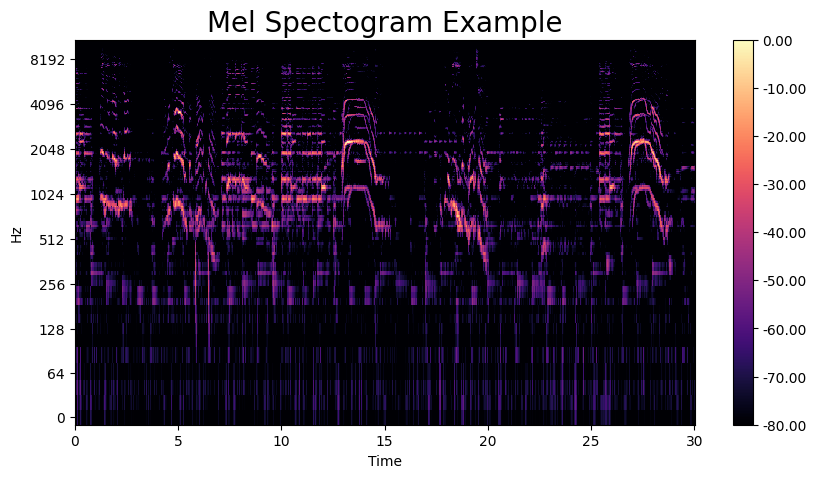

In [94]:
# plot the mel spectogram
fig, ax = plt.subplots(figsize=(10,5))
img = librosa.display.specshow(S_db_mel, x_axis='time', y_axis='log', ax=ax)
ax.set_title('Mel Spectogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f');

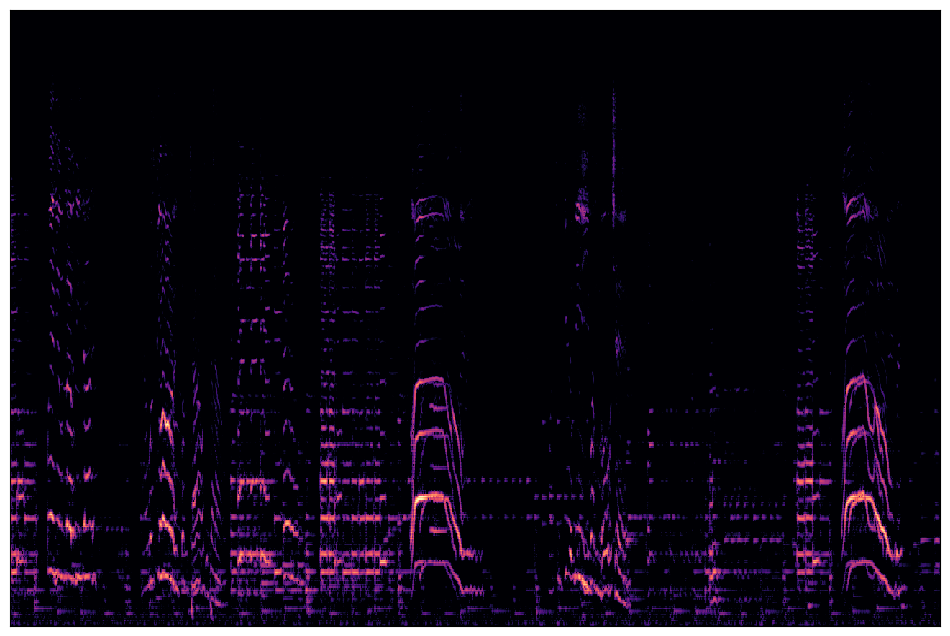

In [73]:
fig, ax = plt.subplots(1, figsize=(12,8))

img = librosa.display.specshow(
    S_db_mel, sr=sr, hop_length=hop_length, ax=ax)

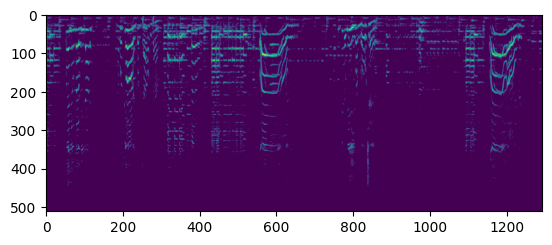

In [89]:
plt.imshow(S_db_mel+8000)

In [ ]:
img = librosa.display.specshow(mel_spectogram_data[genre][i], sr = sampling_rate, hop_length = hop_length,cmap = 'cool',ax=ax)


In [86]:
!ls

aa.png	data_exploration.ipynb	lightning_logs	training.ipynb


In [ ]:
print("Transforming the Audio Files into Mel Spectrograms:")

mel_spectogram_data = {}
for genre in genre_dict.keys():
    print("\t",genre)
    
    mel_spectogram_data[genre] = []

    for name in glob.glob(path_audio_files + genre + "/*"):
        
        if(name != "../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00054.wav"):
        
            data,sampling_rate = librosa.load(name)

            mel_spec = librosa.feature.melspectrogram(y = data.ravel(), sr=sampling_rate,hop_length = hop_length)
            mel_spec_db = librosa.amplitude_to_db(mel_spec, ref=np.max)

            mel_spectogram_data[genre].append(mel_spec_db)
            

print("Saving the Mel Spectrogram Images:")
            
os.mkdir(path_imgs)
for genre in genre_dict.keys():
    print("\t",genre)
    try:
        os.mkdir(path_imgs + genre)
    except:
        pass
    
    for i in range(len(mel_spectogram_data[genre])):

        fig, ax = plt.subplots(1, figsize=(12,8))

        img = librosa.display.specshow(mel_spectogram_data[genre][i], sr = sampling_rate, hop_length = hop_length,cmap = 'cool',ax=ax)

        fig.savefig(path_imgs + genre + "/" + genre + "_" + str(i) + ".png")
        
        plt.close()

## Dataset creation

In [9]:
from tqdm.notebook import tqdm

In [98]:
OUT_FOLDER = "../data/gtzan_processed"

In [99]:
processed_files = {
    'path': [],
    'genre': [],
}

for af in tqdm(audio_files):
    af_arr = af.split('/')
    genre = af_arr[-2]
    fname = af_arr[-1]
    
    genre_folder = f"{OUT_FOLDER}/{genre}"
    
    os.makedirs(genre_folder, exist_ok=True)
    
    # Load audio file and create spectrogram
    y, sr = librosa.load(af)
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=256)
    S_db_mel = librosa.amplitude_to_db(S, ref=np.max)
    
    out_file = f"{genre_folder}/{fname[:-4]}.npy"
    
    processed_files['path'].append(out_file)
    processed_files['genre'].append(genre)
    
    np.save(out_file, S_db_mel)

  0%|          | 0/999 [00:00<?, ?it/s]

In [110]:
S_db_mel.shape

(256, 1293)

In [100]:
df = pd.DataFrame(processed_files)

In [101]:
df['path'] = df['path'].apply(lambda x: x[8+15+1:])

In [102]:
df.head()

,path,genre
0,metal/metal.00000.npy,metal
1,metal/metal.00032.npy,metal
2,metal/metal.00034.npy,metal
3,metal/metal.00063.npy,metal
4,metal/metal.00090.npy,metal


### Train/test split

In [103]:
from sklearn.model_selection import train_test_split

In [104]:
df_train, df_test = train_test_split(df, test_size=0.2, stratify=df['genre'])

In [105]:
df_train['subset'] = 'train'
df_test['subset'] = 'test'

In [106]:
df_full = pd.concat((df_train, df_test)).sample(frac=1.0) # frac is to shuffle

In [107]:
df_full.head(n=10)

,path,genre,subset
442,country/country.00087.npy,country,train
941,hiphop/hiphop.00037.npy,hiphop,test
123,reggae/reggae.00027.npy,reggae,train
633,pop/pop.00071.npy,pop,train
901,hiphop/hiphop.00081.npy,hiphop,train
343,rock/rock.00018.npy,rock,train
819,disco/disco.00035.npy,disco,train
309,rock/rock.00052.npy,rock,train
159,reggae/reggae.00068.npy,reggae,test
1,metal/metal.00032.npy,metal,train


In [108]:
df_full.to_csv(f"{OUT_FOLDER}/metadata.csv", index=False)